# import pandas as pd

## Workshop: Pandas and Data Manipulation

In this workshop, we will use pandas to load, describe, and query datasets.

### Cheatsheet

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

### References

1. https://pandas.pydata.org/pandas-docs/stable/  
2. Python Data Science Handbook by Jake VanderPlas
3. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney
4. https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html


### Installation

Windows: Start Button -> "Anaconda Prompt"

Ubuntu / MacOS: conda should be in your path

Activate the environment

```
conda activate module1
```

Pandas should already be installed. If not, install it:

```
conda install pandas
```

Tip: You can check the versions installed by calling Python with a script:
```
python -c "import pandas; print(pandas.__version__)"
```

### SGD to USD Exchange Rate Data

Similar to the NumPy workshop, we'll use the historical SGD to USD exchange rates from data.gov.sg to demonstrate some Pandas concepts.

In [ ]:
from IPython.display import IFrame

IFrame('https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual/resource/f927c39b-3b44-492e-8b54-174e775e0d98/view/43207b9f-1554-4afb-98fe-80dfdd6bb4f6', width=600, height=400)

### Download Instructions

You should already have this dataset from the NumPy workshop. If not, here are the instructions:

1. Go to https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual
2. Click on the `Download` button
3. Unzip and extract the `.csv` file. Note the path for use below.

### Import the package

In [ ]:
import pandas as pd

In [90]:
pd?

### Two main data structures

1. Series
2. DataFrame

### Series
```
pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```
- Similar to 1-d numpy array but with more flexible explicit indexing
- Has two components : index and value for each element
- A bit similar concept as dictionary
- [more here..](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html')

### DataFrame
```
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```
- The primary pandas data structure
- Tabular format similar to excel
- Two-dimensional, potentially heterogeneous tabular data
- structure with labeled axes (rows and columns). Row and columns index
- Can be thought of as a dict-like container for Series objects. 
- [more here..](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### Read data from CSV to a Series

You can use `pandas.read_csv` to read data into:
- A Series, if the data contains only 1 column and you specify the `squeeze=True` option, or
- A DataFrame, for any number of columns. This is the default behavior because the DataFrame is the most flexible.

[more here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [6]:
# Read data into a series
sgd_usd_series = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                     parse_dates=True, index_col=0, infer_datetime_format=True,
                     squeeze=True)

# inspect the first 10 values
sgd_usd_series.head(10)

date
1988-01-08    2.0443
1988-01-15    2.0313
1988-01-22    2.0205
1988-01-29    2.0182
1988-02-05    2.0160
1988-02-12    2.0173
1988-02-19    2.0189
1988-02-26    2.0130
1988-03-04    2.0154
1988-03-11    2.0131
Name: exchange_rate_usd, dtype: float64

In [19]:
sgd_usd_series.describe()

count    3993.000000
mean        1.494808
std         0.197901
min         1.200900
25%         1.303300
50%         1.462200
75%         1.669100
max         2.050300
Name: exchange_rate_usd, dtype: float64

In [7]:
# Read data into a data frame
sgd_usd_df = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                     parse_dates=True, index_col=0, infer_datetime_format=True)

# inspect the first 10 values
sgd_usd_df.head(10)

,exchange_rate_usd
date,
1988-01-08,2.0443
1988-01-15,2.0313
1988-01-22,2.0205
1988-01-29,2.0182
1988-02-05,2.0160
1988-02-12,2.0173
1988-02-19,2.0189
1988-02-26,2.0130
1988-03-04,2.0154


In [18]:
sgd_usd_df.describe()

,exchange_rate_usd
count,3993.000000
mean,1.494808
std,0.197901
min,1.200900
25%,1.303300
50%,1.462200
75%,1.669100
max,2.050300


### Get values or indices

Series
- use series.values
- use series.index

DataFrame
- use df.values
- use df.index

Note: these are properties, not function calls with ()

For this dataset:
- Series.values is a 1 dimensional numpy.array
- DataFrame.values is not. It's actually 2 dimensional:

    number of samples (rows) x 1 (column)
   
This is because DataFrame is a more general data structure that can hold more columns.

In [8]:
sgd_usd_series.values

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

In [9]:
sgd_usd_df.values

array([[ 2.0443],
       [ 2.0313],
       [ 2.0205],
       ..., 
       [ 1.3763],
       [ 1.3834],
       [ 1.3827]])

In [10]:
sgd_usd_series.values.shape

(3993,)

In [13]:
sgd_usd_series.values.ndim # rank = 1

1

In [11]:
sgd_usd_df.values.shape

(3993, 1)

In [12]:
sgd_usd_df.values.ndim # rank = 2

2

In [15]:
# Tip: you can flatten the 3993 x 1 numpy array
sgd_usd_df.values.flatten()

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

The .index is the same whether it is a Series or a DataFrame

In [16]:
sgd_usd_series.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

In [51]:
sgd_usd_df.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

### Get the summary

Try these on `sgd_usd_series` and `sgd_usd_df`. 

|  |  |
|--|--|
|df.columns | Describe DataFrame columns|
|df.info() | Information on a DataFrame |
|s.count(), df.count() | Number of non-NA values|
|s.count() | Number of non-NA values|

Note: these are from the Cheatsheet. Series supports fewer methods.

### Get statistics

Try these on `sgd_usd_series` and `sgd_usd_df`. 

|  |  |
|--|--|
|s.sum(), df.sum() | Sum of values|
|s.cumsum(), df.cumsum() | Cummulative sum of values |
|s.min()/s.max(), df.min()/df.max() | Minimum/maximum values|
|s.idxmin()/series.idxmax(), df.idxmin()/df.idxmax() | Minimum/Maximum index value|
|s.describe(), df.describe() | Summary statistics |
|s.mean(), df.mean() | Mean of values |
|s.median(), df.median() | Median of values | 

Note: these are from the Cheatsheet

### Joins

Let's say we need to also show Singapore Dollar and Renminbi (CNY) exchange rates, but from a different data set.

This dataset is already downloaded for you in the `data` folder.

In [52]:
# data source: https://www.exchangerates.org.uk
sgd_cny_df = pd.read_csv('data/sgd_cny_rates_daily.csv',
                          parse_dates=True, index_col=0, infer_datetime_format=True)
print('First 5 entries:')
sgd_cny_df.head(5)

First 5 entries:


,Singapore Dollar to Chinese Yuan
Date,
2018-05-27,4.7499
2018-05-26,4.7620
2018-05-25,4.7610
2018-05-24,4.7618
2018-05-23,4.7553


In [53]:
sgd_cny_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3224 entries, 2018-05-27 to 2009-10-06
Data columns (total 1 columns):
Singapore Dollar to Chinese Yuan    3224 non-null float64
dtypes: float64(1)
memory usage: 50.4 KB


In [54]:
sgd_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3993 entries, 1988-01-08 to 2015-10-19
Data columns (total 1 columns):
exchange_rate_usd    3993 non-null float64
dtypes: float64(1)
memory usage: 222.4 KB


`sgd_cny_df`: DatetimeIndex: 3224 entries, 2018-05-27 to 2009-10-06

`sgd_usd_df`: DatetimeIndex: 3993 entries, 1988-01-08 to 2015-10-19

- have different date ranges
- one is in decreasing time order, the other is increasing time order 

Pandas DataFrames make it easy to join these datasets together based on index.

You can do this without looping over the data, using `DataFrame.join()`

[more info..](https://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index)

In [83]:
# Default join is an `left` join, where the index of the left series (`sgd_usd_df`) is preserved.

sgd_usd_cny = sgd_usd_df.join(sgd_cny_df)
sgd_usd_cny

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
1988-01-08,2.0443,NaN
1988-01-15,2.0313,NaN
1988-01-22,2.0205,NaN
1988-01-29,2.0182,NaN
1988-02-05,2.0160,NaN
1988-02-12,2.0173,NaN
1988-02-19,2.0189,NaN
1988-02-26,2.0130,NaN
1988-03-04,2.0154,NaN
1988-03-11,2.0131,NaN


We can remove the NaN entries using dropna()

In [84]:
sgd_usd_cny = sgd_usd_cny.dropna()
sgd_usd_cny

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039
2009-10-12,1.4014,4.8791
2009-10-13,1.3972,4.8871
2009-10-14,1.3939,4.9050
2009-10-15,1.3861,4.9157
2009-10-16,1.3884,4.9051
2009-10-19,1.3953,4.9037


The result is a DataFrame with entries where both exchange rates are present.

Entries where either SGD-USD or SGD-CNY are missing are excluded.

Note that even though the index for the series are in different order, join will still work because it matches the individual index values

### When in doubt, visualize

Let's visualize what we just did by plotting the dataframes.

You should have already installed matplotlib. If not, do this:
```
conda install matplotlib
```

In [85]:
# Find the names of the columns
sgd_usd_cny.columns

Index(['exchange_rate_usd', 'Singapore Dollar to Chinese Yuan'], dtype='object')

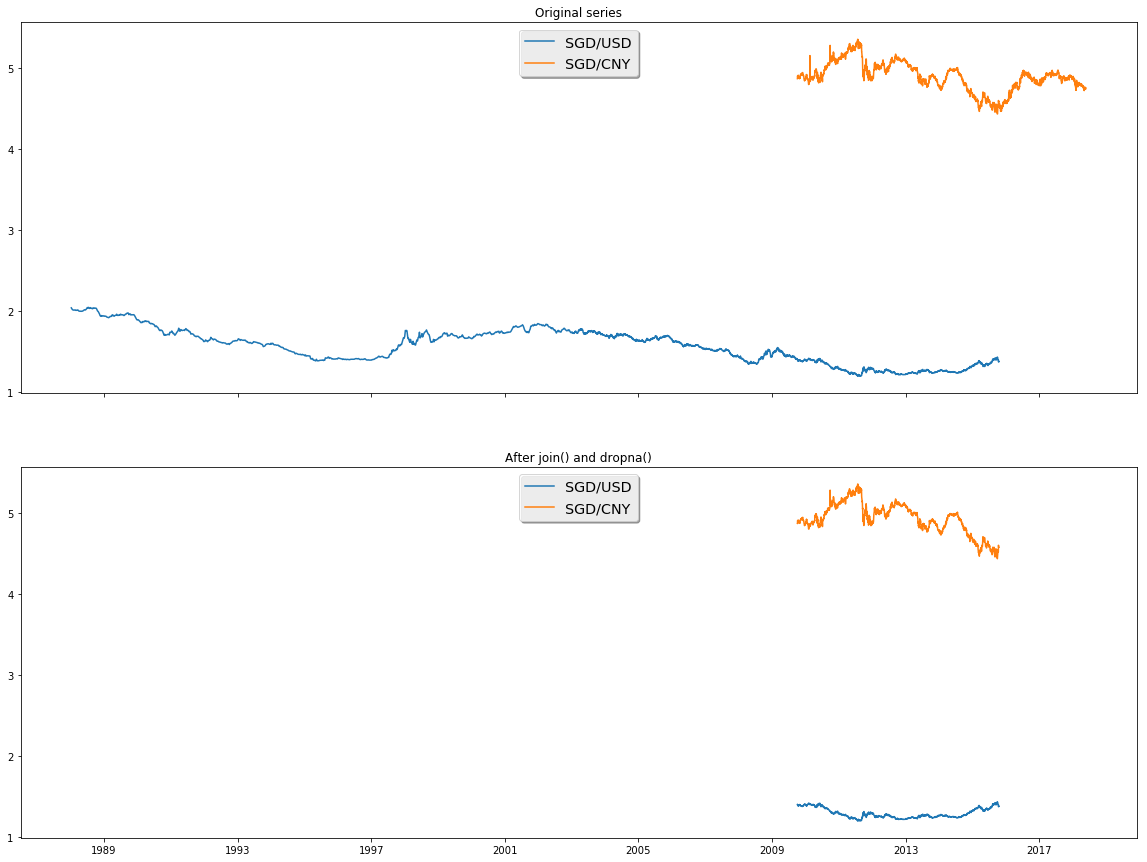

In [86]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,15),
                              sharex=True) # common x-axis for all subplots

ax1.set_title('Original series')
ax1.plot(sgd_usd_df, label='SGD/USD')
ax1.plot(sgd_cny_df, label='SGD/CNY')
ax1.legend(loc='upper center', shadow=True, fontsize='x-large')

ax2.set_title('After join() and dropna()')
ax2.plot(sgd_usd_cny['exchange_rate_usd'], label='SGD/USD')
ax2.plot(sgd_usd_cny['Singapore Dollar to Chinese Yuan'], label='SGD/CNY')
ax2.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

### Exercise

1. Repeat the above using other types of join, such as `outer`

2. What happens if you join the SGD/CNY DataFrame with the SGD/USD DataFrame?

```
sgd_cny_usd = sgd_cny_df.join(sgd_usd_df)
```

### Pandas, like SQL

If you have worked with SQL or databases before, the DataFrame.join() is conceptually the same as SQL.

[Here's](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) a guide that compares Pandas with SQL.

We'll do an example with queries to demonstrate how you can think of Pandas as conceptually equivalent to SQL.

### Exercise: Querying a DataFrame

Let's say you want to query a DataFrame using something equivalent to this SQL syntax:

```
SELECT *
FROM sgd_usd_cny
WHERE date >= '2012-01-01' AND date < '2013-01-01';
```

What will you use in Pandas?

In [235]:
# Use pandas to find all exchange rates from 2012
#
# Refer to https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
#
# Hint 1: use pd.to_datetime
# start = pd.to_datetime('2012-01-01')
# end = pd.to_datetime('2013-01-01')
#
# Hint 2: use sgd_usd_cny.index
#
# Hint 3: add parenthesis for the boolean conditions

start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2013-01-01')

sgd_usd_cny[(sgd_usd_cny.index >= start) & (sgd_usd_cny.index < end)]

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2012-01-03,1.2925,4.9014
2012-01-03,1.2925,4.9014
2012-01-04,1.2874,4.8855
2012-01-05,1.2883,4.8782
2012-01-06,1.2923,4.8732
2012-01-09,1.2994,4.8772
2012-01-10,1.2912,4.8950
2012-01-11,1.2925,4.8928
2012-01-12,1.2928,4.8999
2012-01-13,1.2882,4.8787


### Indexing and Slicing: iloc, loc

|  |  |
|--|--|
|iloc|Select by position|
|loc|Select by label|
|iat|Get scalar value by position (fast iloc)
|at|Get scalar value by label (fast loc)|

In [113]:
sgd_usd_cny.iloc[:4]

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039


In [ ]:
sgd_usd_cny.loc[:4] # error (because index is time, not integer) 

In [104]:
# to use loc, we have to switch to an integer index
df_int_index = pd.DataFrame(sgd_usd_cny.values)

df_int_index.loc[:4]

,0,1
0,1.4046,4.8734
1,1.4031,4.8754
2,1.3949,4.9082
3,1.3918,4.9039
4,1.4014,4.8791


In [170]:
df_int_index.loc[4, 0]

1.4014

In [171]:
# fast single-value access
df_int_index.at[4, 0]

1.4014

### Question

Why do you think `loc[:4]` returns 5 values, whereas `iloc[:4]` returns 4 values?

Hint: try `iloc[:0]`

In [149]:
sgd_usd_cny.iloc[1] # select by row position

exchange_rate_usd                   1.4031
Singapore Dollar to Chinese Yuan    4.8754
Name: 2009-10-07 00:00:00, dtype: float64

In [144]:
sgd_usd_cny.iloc[1]['exchange_rate_usd'] # select by row position, column name

1.4031

In [145]:
sgd_usd_cny.iat[1, 0] # select by row position, column position

1.4031

### Combining with boolean conditions

In [123]:
sgd_usd_cny.loc[sgd_usd_cny['exchange_rate_usd'] > 1.425]

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-09-08,1.4262,4.4912
2015-09-28,1.4259,4.4569
2015-09-29,1.4319,4.4568
2015-09-30,1.4253,4.4652
2015-10-01,1.4258,4.4436
2015-10-02,1.4356,4.4374
2015-10-05,1.4318,4.4740


In [125]:
# more selectors
sgd_usd_cny.loc[sgd_usd_cny['exchange_rate_usd'] > 1.425]['exchange_rate_usd']

2015-09-08    1.4262
2015-09-28    1.4259
2015-09-29    1.4319
2015-09-30    1.4253
2015-10-01    1.4258
2015-10-02    1.4356
2015-10-05    1.4318
Name: exchange_rate_usd, dtype: float64

### Adding and removing rows / columns

|  |  |
|--|--|
|s.drop(), df.drop()| Drop row (axis=0)|
|s.drop('col', axis=1), df.drop('col', axis=1)| Drop column (axis=1)|
|pd.concat([s1, s2], axis=0), pd.concat([df1, df2], axis=0)|Concatenate rows (axis=0)|
|pd.concat([s1, s2], axis=1), pd.concat([df1, df2], axis=1)|Concatenate columns (axis=1)|

In [227]:
# Append a few rows of empty data
index=pd.date_range(start='2015-10-20', end='2015-10-22')

new_df = pd.DataFrame(index=index,
                      columns=sgd_usd_cny.columns)
result = pd.concat([sgd_usd_cny, new_df], axis=0)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781
2015-10-20,NaN,NaN
2015-10-21,NaN,NaN
2015-10-22,NaN,NaN


In [228]:
# Drop the rows
index = pd.date_range(start='2015-10-20', end='2015-10-22')

result.drop(index, inplace=True)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-06,1.4237,4.4741
2015-10-07,1.4243,4.5019
2015-10-08,1.4140,4.5229
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


In [221]:
# Next, drop the rows by index
result.drop(index, inplace=True)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-07,1.4243,4.5019
2015-10-08,1.4140,4.5229
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995


### Exercises: add and remove columns

1. Add a new column called 'SGD to Euro' with empty values
2. Drop the column you just added

In [230]:
# Add a new column called 'SGD to Euro', with empty values
#
# Hint: use index=sgd_usd_cny.index

new_df = pd.DataFrame(index=sgd_usd_cny.index,
                      columns=['SGD to Euro'])

result = pd.concat([sgd_usd_cny, new_df], axis=1)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan,SGD to Euro
2015-10-06,1.4237,4.4741,NaN
2015-10-07,1.4243,4.5019,NaN
2015-10-08,1.4140,4.5229,NaN
2015-10-09,1.4018,4.5500,NaN
2015-10-12,1.4020,4.5191,NaN
2015-10-13,1.4030,4.5226,NaN
2015-10-14,1.3933,4.6034,NaN
2015-10-15,1.3763,4.5995,NaN
2015-10-16,1.3834,4.5894,NaN
2015-10-19,1.3827,4.5781,NaN


In [232]:
# Drop the column you just added
# 
# Hint: use inplace=True

result.drop(['SGD to Euro'], axis=1, inplace=True)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-06,1.4237,4.4741
2015-10-07,1.4243,4.5019
2015-10-08,1.4140,4.5229
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


### Missing data

We saw how to add columns and rows without any data.  Now we'll explore how to deal with the missing data.

Here are some ways:

|  |  |
|--|--|
|dropna|Drop missing values|
|fillna(new_value)|Fill missing values with new_value|
|interpolate()|Use linear interpolation|

We've already seen how dropna() works.

In [236]:
index=pd.date_range(start='2015-10-20', end='2015-10-22')

new_df = pd.DataFrame(index=index,
                      columns=sgd_usd_cny.columns)
result = pd.concat([sgd_usd_cny, new_df], axis=0)
result.tail(10)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-09,1.4018,4.5500
2015-10-12,1.4020,4.5191
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781
2015-10-20,NaN,NaN
2015-10-21,NaN,NaN
2015-10-22,NaN,NaN


In [244]:
# Dropping the NaN values
result.dropna().tail(5)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-13,1.4030,4.5226
2015-10-14,1.3933,4.6034
2015-10-15,1.3763,4.5995
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781


In [243]:
# Filling the NaN values with a meaningful value, such as the median
median = result.median()
result.fillna(median).tail(5)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781
2015-10-20,1.2718,4.9313
2015-10-21,1.2718,4.9313
2015-10-22,1.2718,4.9313


In [242]:
# Using linear interpolation
result.interpolate().tail(5)

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2015-10-16,1.3834,4.5894
2015-10-19,1.3827,4.5781
2015-10-20,1.3827,4.5781
2015-10-21,1.3827,4.5781
2015-10-22,1.3827,4.5781


### Categorical Data

The previous dataset shows how to use pandas for datasets with continous variables (the exchange rate).

Let's see another dataset that demonstrates how to use pandas for categorical variables (such as classes of things).

We'll use the `Annual Motor Vehicle Population by Vehicle Type` dataset from data.gov.sg.

Reference: https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Download Instructions

1. Go to https://data.gov.sg/dataset/annual-motor-vehicle-population-by-vehicle-type
2. Click on the Download button
3. Unzip and extract the .csv file. Note the path for use below.

In [249]:
df = pd.read_csv('D:/tmp/motor-vehicles/annual-motor-vehicle-population-by-vehicle-type.csv',
                 parse_dates=True, index_col=0, infer_datetime_format=True)
df.head(5)

,category,type,number
year,,,
2005-01-01,Cars & Station-wagons,Private cars,401638
2006-01-01,Cars & Station-wagons,Private cars,421904
2007-01-01,Cars & Station-wagons,Private cars,451745
2008-01-01,Cars & Station-wagons,Private cars,476634
2009-01-01,Cars & Station-wagons,Private cars,497116


In [266]:
# get the unique classes
df.category.unique()

array(['Cars & Station-wagons', 'Taxis', 'Motorcycles',
       'Goods & Other Vehicles', 'Buses', 'Tax Exempted Vehicles',
       'Cars and Station-wagons', 'Motorcycles and Scooters',
       'Goods and Other Vehicles'], dtype=object)

In [279]:
# get just the dataFrame for a category
buses = df[df.category =='Buses']
buses.head(5)

,category,type,number
year,,,
2005-01-01,Buses,Omnibuses,3599
2006-01-01,Buses,Omnibuses,3785
2007-01-01,Buses,Omnibuses,3761
2008-01-01,Buses,Omnibuses,3854
2009-01-01,Buses,Omnibuses,4045


In [272]:
# count of each category
for name in df.category.unique():
    print(name, df.loc[df.category == name, "category"].count())

Cars & Station-wagons 60
Taxis 13
Motorcycles 12
Goods & Other Vehicles 48
Buses 65
Tax Exempted Vehicles 52
Cars and Station-wagons 5
Motorcycles and Scooters 1
Goods and Other Vehicles 4


In [306]:
# pick a year (2009) and plot the distributions across types
df_2009 = df[df.index == pd.to_datetime('2009')]
df_2009

,category,type,number
year,,,
2009-01-01,Cars & Station-wagons,Private cars,497116
2009-01-01,Cars & Station-wagons,Company cars,18874
2009-01-01,Cars & Station-wagons,Tuition cars,1011
2009-01-01,Cars & Station-wagons,Rental cars,12763
2009-01-01,Cars & Station-wagons,Off peak cars,47224
2009-01-01,Taxis,Taxis,24702
2009-01-01,Motorcycles,Motorcycles,146337
2009-01-01,Goods & Other Vehicles,Goods-cum-passenger vehicles (GPVs),4771
2009-01-01,Goods & Other Vehicles,Light Goods Vehicles (LGVs),95185


In [322]:
# Create a series with the type as the index, and the numbers as values
s_2009_type = df_2009.number
s_2009_type.index = df_2009.type
s_2009_type

type
Private cars                           497116
Company cars                            18874
Tuition cars                             1011
Rental cars                             12763
Off peak cars                           47224
Taxis                                   24702
Motorcycles                            146337
Goods-cum-passenger vehicles (GPVs)      4771
Light Goods Vehicles (LGVs)             95185
Heavy Goods Vehicles (HGVs)             31884
Very Heavy Goods Vehicles (VHGVs)       12962
Omnibuses                                4045
School buses (CB)                        1849
Private buses                            2795
Private hire buses                       3586
Excursion buses                          3384
Cars & Station-wagons                    2383
Motorcycles                               878
Buses                                     364
Goods & Other Vehicles                  13405
Name: number, dtype: int64

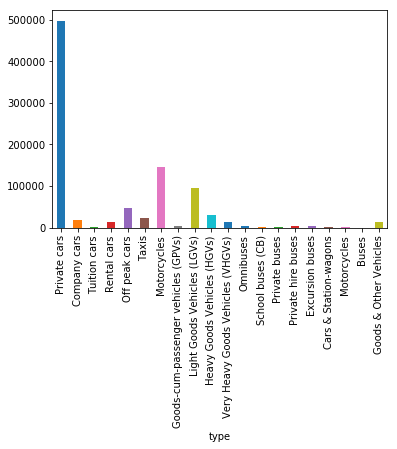

In [323]:
# plot the bar chart
s_2009_type.plot.bar()

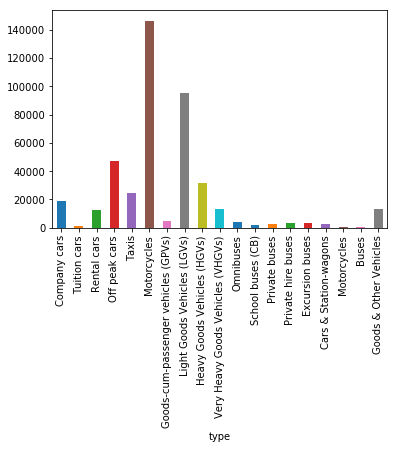

In [328]:
# Let's ignore private cars because they outweigh everything else
s_2009_type[s_2009_type.index != "Private cars"].plot.bar()

In [385]:
# We can make a stacked plot by plotting across several years
pv_year_category = pd.pivot_table(df, index="year", columns="category", values="number")

pv_year_category

category,Buses,Cars & Station-wagons,Cars and Station-wagons,Goods & Other Vehicles,Goods and Other Vehicles,Motorcycles,Motorcycles and Scooters,Tax Exempted Vehicles,Taxis
year,,,,,,,,,
2005-01-01,2644.0,87638.8,NaN,32048.25,NaN,138588.0,NaN,3603.50,22383.0
2006-01-01,2766.2,94461.6,NaN,33210.25,NaN,141881.0,NaN,3794.50,23334.0
2007-01-01,2838.4,102937.0,NaN,34651.00,NaN,143482.0,NaN,3981.75,24446.0
2008-01-01,2995.2,110091.0,NaN,35741.50,NaN,145288.0,NaN,4174.25,24300.0
2009-01-01,3131.8,115397.6,NaN,36200.50,NaN,146337.0,NaN,4257.50,24702.0
2010-01-01,3187.2,119037.0,NaN,35903.25,NaN,147282.0,NaN,4435.00,26073.0
2011-01-01,3330.4,120744.6,NaN,36289.50,NaN,145680.0,NaN,4610.00,27051.0
2012-01-01,3353.6,123514.0,NaN,36261.50,NaN,143286.0,NaN,4757.50,28210.0
2013-01-01,3413.0,124269.0,NaN,36050.50,NaN,144307.0,NaN,4889.00,27695.0


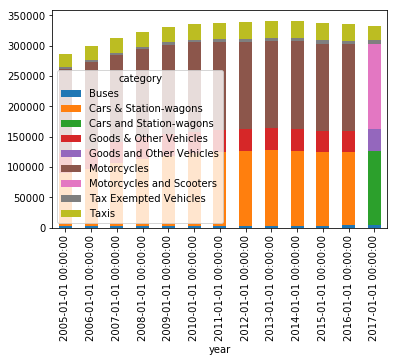

In [387]:
pv_year_category.plot(kind='bar', stacked=True)